# ANÁLISE EXPLORATÓRIA DE DADOS

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 1 Preparação dos Dados e Sanity Check
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1.1 Importando Módulos e Base de Dados

In [256]:
#pip install pandas numpy matplotlib seaborn openpyxl tqdm plotly datetime 

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [258]:
def add_coluna_faltante(name,new,valor,df,tipo):
    #name -> nome da coluna original
    #new -> nome da nova coluna para valores faltantes
    #valor -> valor que substitui os valores faltantes
    #df -> dataframe a ser alterado
    #tipo -> modifica o tipo de dado da coluna
    
    lista=df[name].copy()
    lista.where(lista.isnull(), other=0, inplace=True)
    lista.mask(lista.isnull(), other=1, inplace=True)
    df_lista=pd.DataFrame(lista)
    df_lista=df_lista.rename(columns={"index":name,name:new})
    df.insert(df.shape[1],new,lista)
    df[name] = df[name].where(pd.notnull(df[name]), valor)
    df[new]=df[new].astype('int8')
    return df
    #retorna dataframe processado

In [259]:
#Técnica de Detecção de Outliers - Inter-Quartile Range Method
#Pode ser ajustado

def remove_outlier(df_, col_, fator_=1.8):
    
    #col -> coluna   
    #df_ -> dataframe 
    
    df_ = df_.sort_values(by=[col_])
    q1,q3 = df_[col_].quantile([0.25,0.75])
    iqr = q3-q1
    lower_range = q1-(fator_ * iqr)
    upper_range = q3+(fator_ * iqr)

    return df_[(df_[col_]>lower_range) & (df_[col_]<upper_range)]   
    #retorna dataframe processado

In [260]:
#Remover outliers atraves da CDF

def remover_outlier_percentil(df_, col_):
    
    #col -> coluna   
    #df_ -> dataframe 
    
    df_ = df_.sort_values(by=[col_])
    lower_,upper_ = df_[col_].quantile([0.01,0.95])

    return df_[(df_[col_]>lower_) & (df_[col_]<upper_)]   

In [261]:
path1 = 'dados.xls'
path2 = 'descricao_dados.xlsx'
dataset = pd.read_csv(path1)
descricao = pd.read_excel(path2)

## 1.2 Descrição dos Dados

In [262]:
descricao

,Nome da Variável,Descrição,Descrição 2,Unnamed: 3
0,Escolaridade,Nivel de Escolaridade,1 - Nível Médio 2 - Ensino Superior 3 - Pós Gr...,NaN
1,Renda Mensal Informal,Renda Mensal Informal declarada,NaN,NaN
2,Dependentes,Possui ou não dependentes,NaN,NaN
3,Estado Civil,Estado Civil,"2 - Solteiro, 8 - Casado(a) com comunhão de be...",NaN
4,Idade,Idade do tomador,NaN,NaN
5,Conta Poupanca,Possui Conta Poupança,N- Não,S - Sim
6,Conta Salario,Possui Conta Salário,N- Não,S - Sim
7,Quant Adiantamento Deposito,Quantidade de Adiantamento de Deposito,NaN,NaN
8,Qtd Fonte Renda,Quantidade de Fonte de Renda,NaN,NaN
9,Cheque Sem Fundo,Emitiu Cheque Sem Fundo,N- Não,S - Sim


In [263]:
dataset.shape

(50390, 23)

In [264]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Escolaridade                 14615 non-null  float64
 1   Renda Mensal Informal        9768 non-null   float64
 2   Dependentes                  50390 non-null  object 
 3   Estado Civil                 50390 non-null  int64  
 4   Idade                        50390 non-null  int64  
 5   Conta Poupanca               50390 non-null  object 
 6   Conta Salario                50390 non-null  object 
 7   Quant Adiantamento Deposito  21843 non-null  float64
 8   Qtd Fonte Renda              12806 non-null  float64
 9   Cheque Sem Fundo             50390 non-null  object 
 10  Conta Conjunta               50390 non-null  object 
 11  Valor Conta Corrente         0 non-null      float64
 12  Valor Conta Poupanca         0 non-null      float64
 13  Valor Emprestimo

In [265]:
dataset.describe()

,Escolaridade,Renda Mensal Informal,Estado Civil,Idade,Quant Adiantamento Deposito,Qtd Fonte Renda,Valor Conta Corrente,Valor Conta Poupanca,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Estado
count,14615.000000,9768.000000,50390.000000,50390.000000,21843.000000,12806.000000,0.0,0.0,5.039000e+04,5.039000e+04,5.039000e+04,5.039000e+04,50390.000000,50390.0,5.039000e+04,50390.000000,50390.000000
mean,1.175573,4635.610641,3.503354,31.724529,2.104931,1.241605,NaN,NaN,5.198927e+04,6.022658e+04,6.485391e+04,1.721779e+05,0.790891,1.0,3.740829e+09,0.498333,57.498055
std,0.508951,24776.361024,2.132091,8.565117,0.898459,0.496176,NaN,NaN,1.588819e+06,2.843941e+06,2.728170e+06,7.058290e+06,0.406676,0.0,7.248462e+09,0.500002,1.118008
min,1.000000,0.009600,1.000000,18.000000,1.000000,1.000000,NaN,NaN,1.431000e+03,0.000000e+00,0.000000e+00,1.441500e+03,0.000000,1.0,1.168846e+06,0.000000,56.000000
25%,1.000000,28.173400,2.000000,26.000000,2.000000,1.000000,NaN,NaN,1.593000e+03,1.325675e+02,2.742725e+02,2.840910e+03,1.000000,1.0,1.383124e+06,0.000000,56.000000
50%,1.000000,186.004900,2.000000,30.000000,2.000000,1.000000,NaN,NaN,2.298035e+03,6.489650e+02,1.143320e+03,5.609805e+03,1.000000,1.0,1.439557e+06,0.000000,57.000000
75%,1.000000,1159.021800,4.000000,35.000000,2.000000,1.000000,NaN,NaN,7.172175e+03,3.600000e+03,5.545427e+03,1.791325e+04,1.000000,1.0,4.699642e+07,1.000000,58.000000
max,3.000000,516960.779100,11.000000,113.000000,18.000000,3.000000,NaN,NaN,2.867894e+08,5.737759e+08,5.703619e+08,1.430927e+09,1.000000,1.0,2.399887e+10,1.000000,59.000000


#### Uniformizando o Dataset

In [266]:
dataset.columns=[i.lower() for i in dataset.columns]

## 1.3 Tratando Valores Faltantes

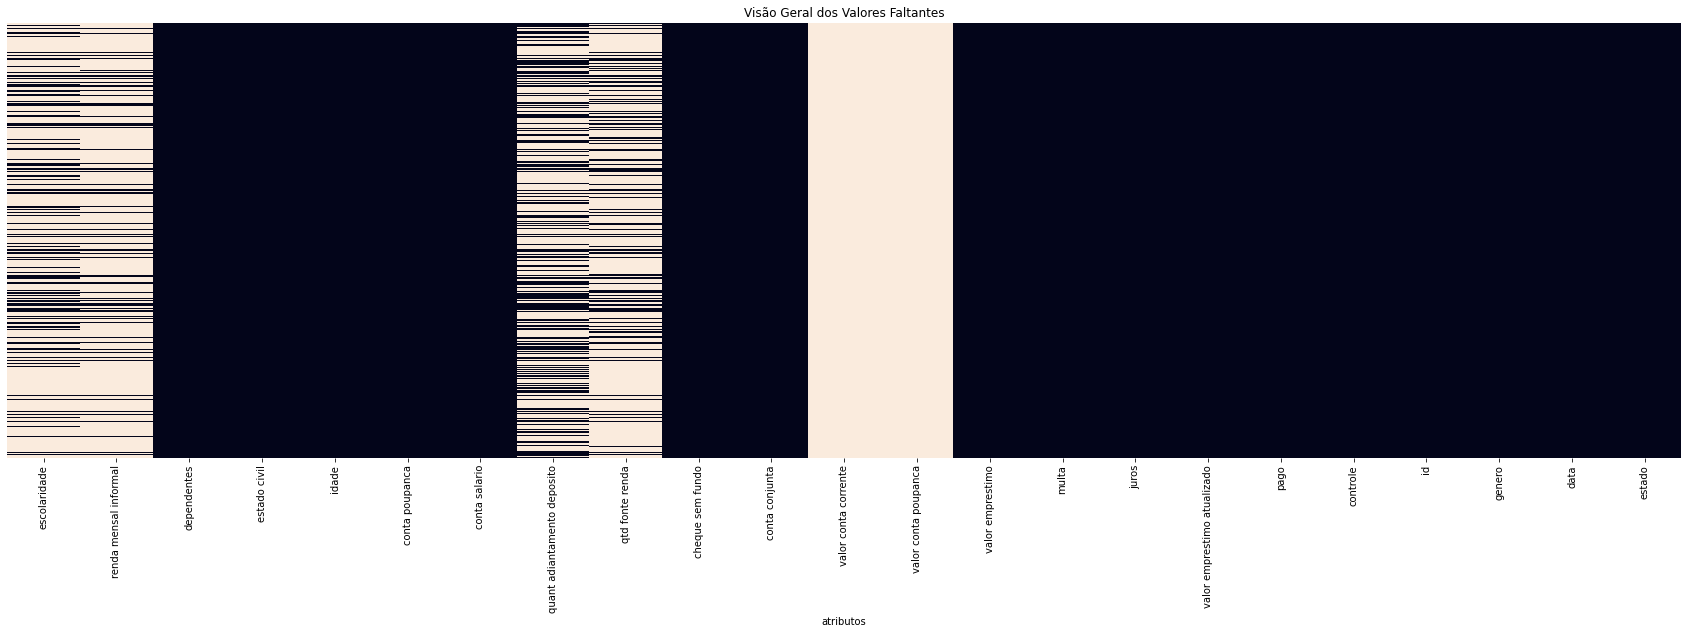

In [267]:
plt.figure(figsize=(30,8))
sns.heatmap(dataset.isnull(),
           yticklabels=0,
           cbar=False)
plt.title('Visão Geral dos Valores Faltantes')
plt.xlabel('atributos')
plt.show()

#### Observações:
##### (4) Escolaridade, Renda Mensal Informal, Quant Adiantamento Deposito e Qtd Fonte de Renda apresentam colunas com valores predominantemente faltantes. 
##### (2) Valor Conta Corrente e Valor Conta Poupança estão completamente vazios 
##### - Constituem a maior parte das variáveis numéricas e estão diretamente relacionadas com a capacidade financeira dos tomadores de crédito.
##### - Um descarte desses valores seria interessante para porcentagens menores de valores faltantes. Além disso, há a possibilidade desses valores faltantes estarem ausentes não por acaso , mas por possuirem alguma relação com outras variáveis da base de dados. Nesse caso, simplesmente descartá-los significaria descartar informação essencial ao modelo.
##### - Uma possível utilização de método substitutivo (média, mediana, ...) é parcialmente inconsistente devido a alta porcentagem de valores faltantes nessas colunas.
##### - Uma opção seria a criação de colunas de classificação binária para os (4) valores parcialmente faltantes, dando mais opções para a criação do modelo se for definido que a utização dessas variáveis é indispensável.
##### - Por fim, descartam-se as (2) colunas totalmente faltantes por se tornarem nulas para o modelo.

In [268]:
lista=dataset['id'].value_counts()
df_lista=pd.DataFrame(lista).reset_index()
df_lista=df_lista.rename(columns={"index":"id","id":"recorrencia"})
dataset=pd.merge(dataset,df_lista,on=['id'],how='left')

In [269]:
dataset=add_coluna_faltante('escolaridade','missing escolaridade',4,dataset,'int8')
dataset=add_coluna_faltante('renda mensal informal','missing renda informal',np.nan,dataset,'int8')
dataset=add_coluna_faltante('quant adiantamento deposito','missing adiantamento',np.nan,dataset,'int8')
dataset=add_coluna_faltante('qtd fonte renda','missing fonte renda',np.nan,dataset,'int8')

In [270]:
target=dataset['pago']
dataset.drop(['pago'],axis='columns',inplace=True)
dataset.insert(dataset.shape[1],'pago',target)

In [271]:
dataset.duplicated().sum()

0

In [272]:
dataset.dtypes

escolaridade                   float64
renda mensal informal          float64
dependentes                     object
estado civil                     int64
idade                            int64
conta poupanca                  object
conta salario                   object
quant adiantamento deposito    float64
qtd fonte renda                float64
cheque sem fundo                object
conta conjunta                  object
valor conta corrente           float64
valor conta poupanca           float64
valor emprestimo               float64
multa                          float64
juros                          float64
valor emprestimo atualizado    float64
controle                         int64
id                             float64
genero                           int64
data                            object
estado                           int64
recorrencia                      int64
missing escolaridade              int8
missing renda informal            int8
missing adiantamento     

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 2 Entendendo os Dados
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [273]:
dataset.isnull().sum()

escolaridade                       0
renda mensal informal          40622
dependentes                        0
estado civil                       0
idade                              0
conta poupanca                     0
conta salario                      0
quant adiantamento deposito    28547
qtd fonte renda                37584
cheque sem fundo                   0
conta conjunta                     0
valor conta corrente           50390
valor conta poupanca           50390
valor emprestimo                   0
multa                              0
juros                              0
valor emprestimo atualizado        0
controle                           0
id                                 0
genero                             0
data                               0
estado                             0
recorrencia                        0
missing escolaridade               0
missing renda informal             0
missing adiantamento               0
missing fonte renda                0
p

In [274]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50390 entries, 0 to 50389
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   escolaridade                 50390 non-null  float64
 1   renda mensal informal        9768 non-null   float64
 2   dependentes                  50390 non-null  object 
 3   estado civil                 50390 non-null  int64  
 4   idade                        50390 non-null  int64  
 5   conta poupanca               50390 non-null  object 
 6   conta salario                50390 non-null  object 
 7   quant adiantamento deposito  21843 non-null  float64
 8   qtd fonte renda              12806 non-null  float64
 9   cheque sem fundo             50390 non-null  object 
 10  conta conjunta               50390 non-null  object 
 11  valor conta corrente         0 non-null      float64
 12  valor conta poupanca         0 non-null      float64
 13  valor emprestimo

## 2.1 Atributos Categóricos

#### 1. Estado
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Text(0, 0.5, 'QTD DE EMPRESTIMOS')

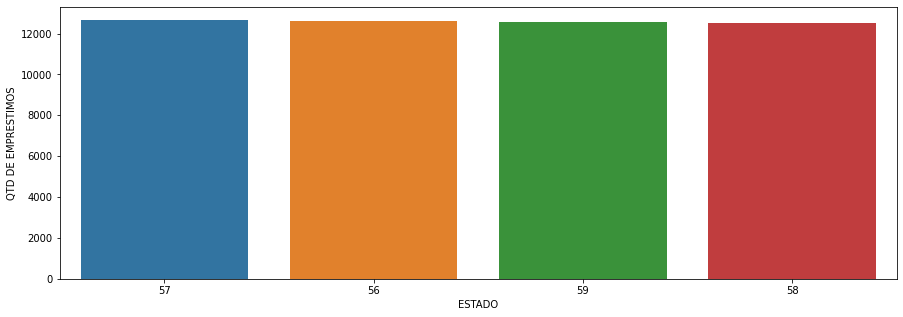

In [275]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='estado',
                data=dataset,
                order=dataset['estado'].value_counts().index)
graph.set_xlabel('ESTADO')
graph.set_ylabel('QTD DE EMPRESTIMOS')

#### (56) São Paulo --------- (57) Minas Gerais
#### (58) Rio de Janeiro ---------- (59) Espírito Santo

##### 1 - Existe também a possibilidade de retirar essa variável do modelo a fim de evitar certo determinismo geográfico ou regionalismo. Especialmente se considerarmos as desigualdades entre as regiões brasileiras.
##### 2 - Tratando-se de estados do Sudeste somente, talvez não seja o caso nessa base de dados.

In [276]:
for i in list(dataset['estado'].unique()):
    neg=dataset[dataset['estado']==i]['pago'].value_counts()[0]
    pos=dataset[dataset['estado']==i]['pago'].value_counts()[1]
    total=pos+neg
    print("Inadimplência para categoria",i," é : ",round(neg/total*100,2),"% || Inadimplência Absoluta :",round(neg/dataset['estado'].shape[0]*100,2),"%")

Inadimplência para categoria 57  é :  20.83 % || Inadimplência Absoluta : 5.24 %
Inadimplência para categoria 59  é :  21.04 % || Inadimplência Absoluta : 5.26 %
Inadimplência para categoria 56  é :  20.67 % || Inadimplência Absoluta : 5.17 %
Inadimplência para categoria 58  é :  21.11 % || Inadimplência Absoluta : 5.25 %


##### 1 - A uniformidade da distribuição entre os estados torna essa variável candidata a ser retirada de um eventual modelo a fim de simplificá-lo.
##### Talvez isso seja devido a proximidade geográfica entre os estados listados. (Homogeneidade)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 2. Escolaridade
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Transformando os valores faltantes da categoria 'escolaridade' em 4 -> (não informado)

Text(0, 0.5, 'QTD DE EMPRESTIMOS')

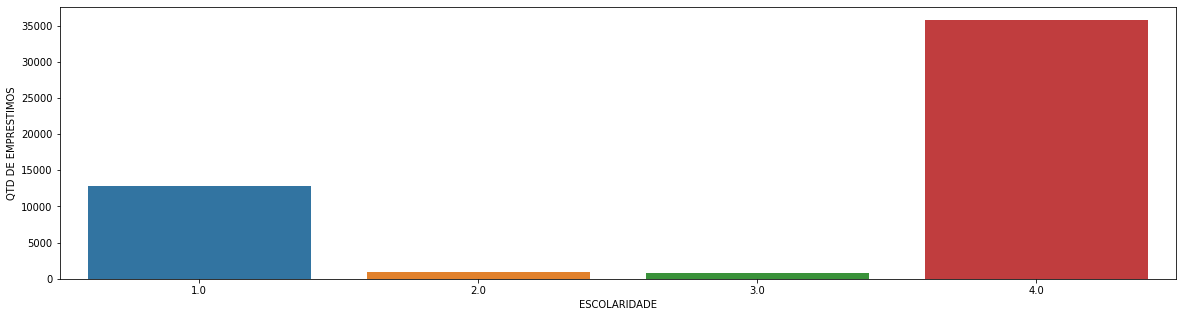

In [277]:
plt.figure(figsize=(20,5))
graph=sns.countplot(x='escolaridade',
                data=dataset)
graph.set_xlabel('ESCOLARIDADE')
graph.set_ylabel('QTD DE EMPRESTIMOS')

#### (1) Ensino Médio ------------- (3) Pós Graduação
#### (2) Ensino Superior ------------- (4) Não Informado

##### Observamos que a distribuição de valores entre as categorias é desbalanceada
##### Existem dois contextos para a existência desses valores faltantes:
##### 1 - Os dados estão ausentes ao acaso e sua ausência não tem relação com as outras variáveis da base de dados. (Missing Values at Random)
##### 2 - Os dados estão ausentes por estarem relacionados com outras variáveis do modelo (Missing Not at Random)

In [278]:
dataset['escolaridade'].value_counts()

4.0    35775
1.0    12884
2.0      896
3.0      835
Name: escolaridade, dtype: int64

In [279]:
for i in range(dataset['escolaridade'].unique().shape[0]):
    neg=dataset[dataset['escolaridade']==i+1]['pago'].value_counts()[0]
    pos=dataset[dataset['escolaridade']==i+1]['pago'].value_counts()[1]
    total=pos+neg
    print("Inadimplência para categoria",i+1," é : ",round(neg/total*100,2),"% || Inadimplência Absoluta :",round(neg/dataset['escolaridade'].shape[0]*100,2),"%")

Inadimplência para categoria 1  é :  10.31 % || Inadimplência Absoluta : 2.64 %
Inadimplência para categoria 2  é :  20.54 % || Inadimplência Absoluta : 0.37 %
Inadimplência para categoria 3  é :  20.72 % || Inadimplência Absoluta : 0.34 %
Inadimplência para categoria 4  é :  24.74 % || Inadimplência Absoluta : 17.57 %


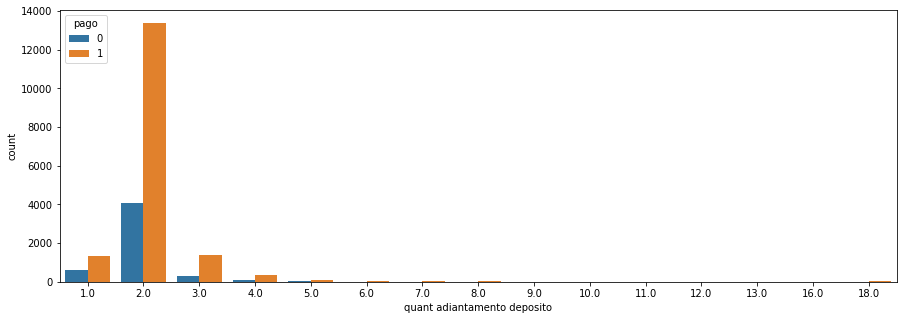

In [280]:
plt.figure(figsize=(15,5))
sns.countplot(x="quant adiantamento deposito",hue="pago",data=dataset)
plt.show()

In [281]:
dataset[dataset['escolaridade'].isnull()==0]['pago'].value_counts()

1    39853
0    10537
Name: pago, dtype: int64

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 3. Estado Civil
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

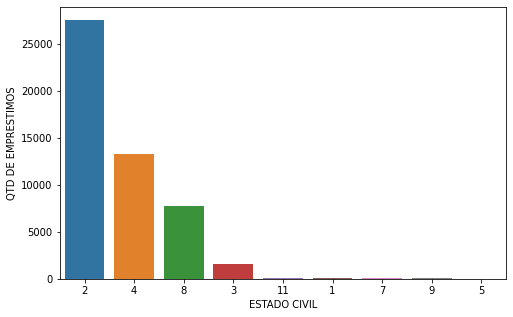

In [282]:
plt.figure(figsize=(8,5))
graph=sns.countplot(x='estado civil',data=dataset,
                   order=dataset['estado civil'].value_counts().index)
graph.set_xlabel('ESTADO CIVIL')
graph.set_ylabel('QTD DE EMPRESTIMOS')
plt.show()

In [283]:
dataset['estado civil'].value_counts()

2     27566
4     13283
8      7765
3      1560
11       74
1        67
7        41
9        33
5         1
Name: estado civil, dtype: int64

#### (1) Divorciado  
#### (2) Solteiro 
#### (3) Casado(a) com separação de bens
#### (4) Casado(a) com comunhão parcial de bens
#### (5) Não consta na base de dados
#### (7) Viúvo(a) 
#### (8) Casado(a) com comunhão de bens
#### (9) Outros
#### (11) Separado Judicialmente

In [284]:
dataset=dataset[dataset['estado civil']!=5]

In [285]:
dataset['estado civil'].value_counts()

2     27566
4     13283
8      7765
3      1560
11       74
1        67
7        41
9        33
Name: estado civil, dtype: int64

#### Apesar do desbalanceamento e dos outliers, retirar essas ocorrências seria perder informação útil sobre categorias menos representadas

In [286]:
for i in range(11):
    try:
        neg=dataset[dataset['estado civil']==i+1]['pago'].value_counts()[0]
        pos=dataset[dataset['estado civil']==i+1]['pago'].value_counts()[1]
        total=pos+neg
    except:
        print("Não existe categoria",i+1)
    if(not(i+1 in [5,6,10])):
        print("Inadimplência para categoria",i+1," é : ",round(neg/total*100,2),"% || Inadimplência Absoluta :",round(neg/dataset['estado civil'].shape[0]*100,2),"%")

Inadimplência para categoria 1  é :  8.96 % || Inadimplência Absoluta : 0.01 %
Inadimplência para categoria 2  é :  11.21 % || Inadimplência Absoluta : 6.13 %
Inadimplência para categoria 3  é :  26.35 % || Inadimplência Absoluta : 0.82 %
Inadimplência para categoria 4  é :  38.72 % || Inadimplência Absoluta : 10.21 %
Não existe categoria 5
Não existe categoria 6
Inadimplência para categoria 7  é :  56.1 % || Inadimplência Absoluta : 0.05 %
Inadimplência para categoria 8  é :  23.22 % || Inadimplência Absoluta : 3.58 %
Inadimplência para categoria 9  é :  78.79 % || Inadimplência Absoluta : 0.05 %
Não existe categoria 10
Inadimplência para categoria 11  é :  44.59 % || Inadimplência Absoluta : 0.07 %


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 4. Gênero (Categórico - Binário)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

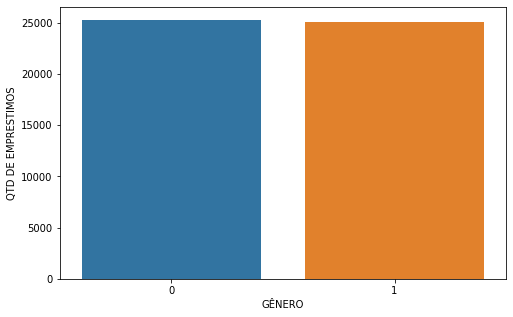

In [287]:
plt.figure(figsize=(8,5))
graph=sns.countplot(x='genero',data=dataset,
                   order=dataset['genero'].value_counts().index)
graph.set_xlabel('GÊNERO')
graph.set_ylabel('QTD DE EMPRESTIMOS')
plt.show()

##### (0) Masculino ------------- (1) Feminino

##### Distribuição Homogênea

In [288]:
dataset['genero'].value_counts()

0    25279
1    25110
Name: genero, dtype: int64

In [289]:
for i in range(dataset['genero'].unique().shape[0]):
    neg=dataset[dataset['genero']==i]['pago'].value_counts()[0]
    pos=dataset[dataset['genero']==i]['pago'].value_counts()[1]
    total=pos+neg
    print("Inadimplência para categoria",i," é : ",round(neg/total*100,2),"% || Inadimplência Absoluta :",round(neg/dataset['genero'].shape[0]*100,2),"%")

Inadimplência para categoria 0  é :  20.63 % || Inadimplência Absoluta : 10.35 %
Inadimplência para categoria 1  é :  21.19 % || Inadimplência Absoluta : 10.56 %


#### Devido a homogeneidade, poderia ser retirada a fim de simplificar o modelo. Porém, provavelmente perderíamos informações relativas às outras variáveis, associações que dependem do gênero.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 5. Controle (Categórico - Binário)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [290]:
dataset['controle'].value_counts()

1    50389
Name: controle, dtype: int64

##### Valor único para todas as entradas, e como não parece ter relação direta com o problema da inadimplência, é candidata a ser retirada

## 2.2 Atributos Contínuos

#### 1. Renda Mensal Informal
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<AxesSubplot:xlabel='renda mensal informal', ylabel='Density'>

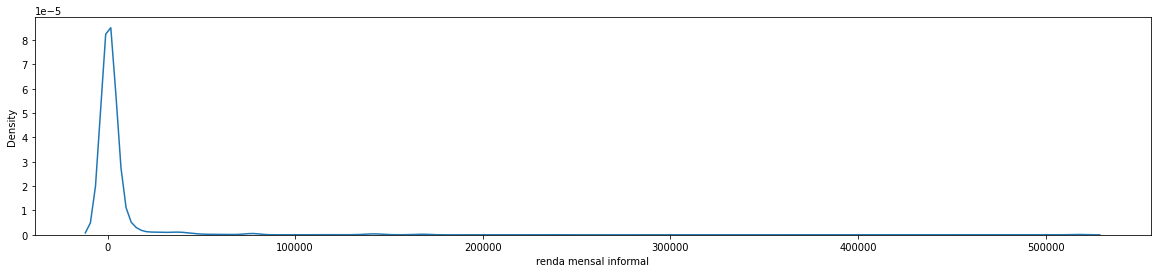

In [291]:
plt.figure(figsize=(20,4))
sns.kdeplot(data=dataset,x="renda mensal informal")

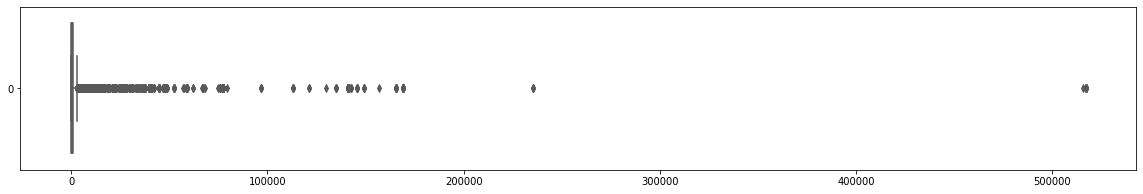

In [292]:
plt.figure(figsize=(20,3))
ax = sns.boxplot(data=dataset["renda mensal informal"], orient="h", palette="Set2")

(0.0, 5000.0)

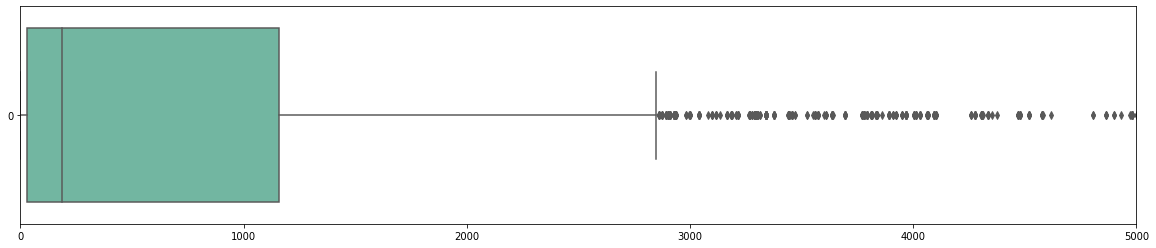

In [293]:
plt.figure(figsize=(20,4))
ax = sns.boxplot(data=dataset["renda mensal informal"], orient="h", palette="Set2")
plt.xlim(0, 5000)

##### 1) Boxplot para conhecer a dispersão e outliers 
##### 2) Distribuição assimétrica, com outliers que destoam muito da amplitude máxima 
##### 3) A mediana tem uma disposição assimétrica na dispersão (caixa)
##### 4) Para essa variável , o uso do método IQR pode ser uma solução para reduzir as distorções 

In [294]:
dataset['renda mensal informal'].value_counts()

955.0468      52
5151.2439     44
77320.4965    42
177.5000      39
10942.6928    37
              ..
1973.3566      1
14.8550        1
1931.4738      1
152.4980       1
292.8242       1
Name: renda mensal informal, Length: 2341, dtype: int64

In [295]:
dataset[dataset['renda mensal informal'].isnull()==0]['pago'].value_counts()

1    8562
0    1206
Name: pago, dtype: int64

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 2. Idade
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<AxesSubplot:xlabel='idade', ylabel='Density'>

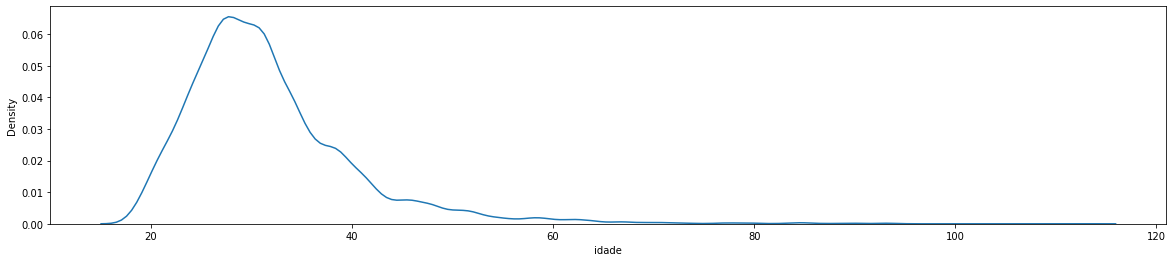

In [296]:
plt.figure(figsize=(20,4))
sns.kdeplot(data=dataset,x="idade")

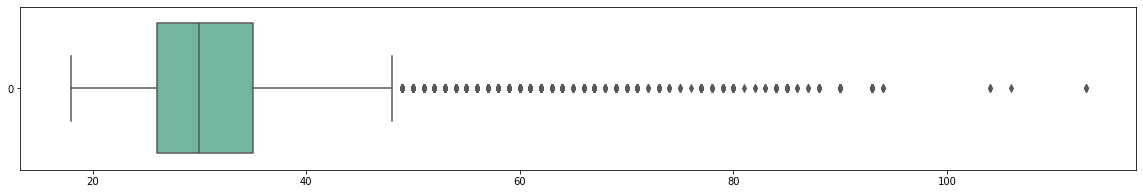

In [297]:
plt.figure(figsize=(20,3))
ax = sns.boxplot(data=dataset["idade"], orient="h", palette="Set2")

##### 1) Boxplot para conhecer a dispersão e outliers 
##### 2) A remoção de idades pode significar perda de informação importante sobre uma faixa de dados pouco representada devido ao desbalanceamento da base.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 3. Multa 
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<AxesSubplot:xlabel='multa', ylabel='Density'>

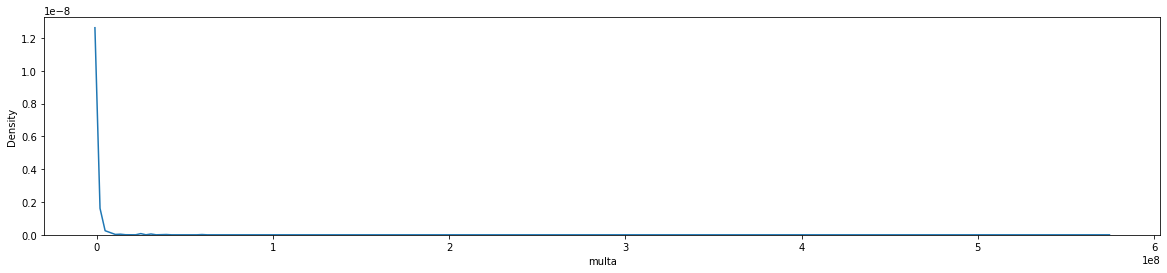

In [298]:
plt.figure(figsize=(20,4))
sns.kdeplot(data=dataset,x="multa")

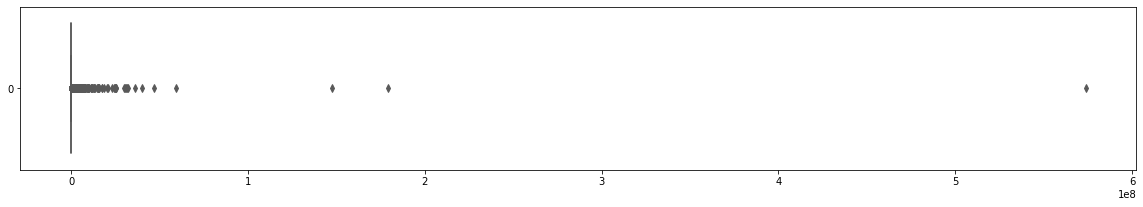

In [299]:
plt.figure(figsize=(20,3))
ax = sns.boxplot(data=dataset["multa"], orient="h", palette="Set2")

(0.0, 10000.0)

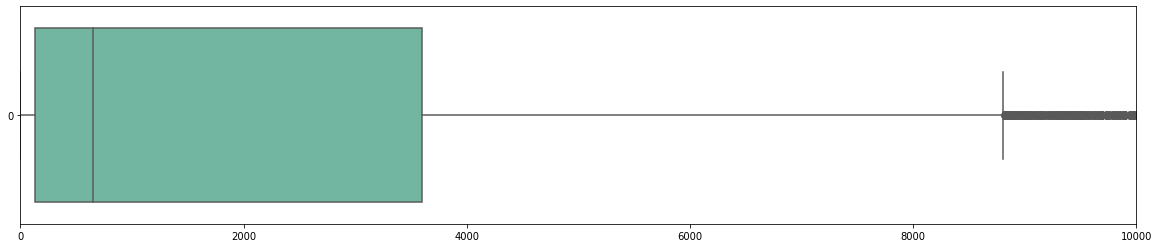

In [300]:
plt.figure(figsize=(20,4))
ax = sns.boxplot(data=dataset["multa"], orient="h", palette="Set2")
plt.xlim(0, 10000)

##### 1) Boxplot para conhecer a dispersão e outliers 
##### 2) Distribuição assimétrica, com outliers que destoam muito da amplitude máxima 
##### 3) A mediana tem uma disposição assimétrica na dispersão (caixa)
##### 4) Para essa variável , o uso do método IQR pode ser uma solução para reduzir as distorções 

In [301]:
dataset['multa'].value_counts()

193.40     167
72.87      154
810.50     134
913.50     128
1214.50    121
          ... 
553.70       1
2428.77      1
38.30        1
37.79        1
1038.40      1
Name: multa, Length: 33767, dtype: int64

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 4. Juros 
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

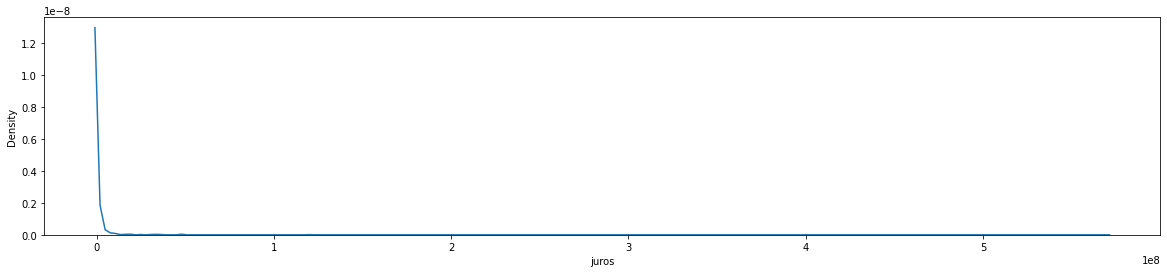

In [302]:
plt.figure(figsize=(20,4))
sns.kdeplot(data=dataset,x="juros")
ax.set_xlabel('JUROS')
ax.set_ylabel('IDADE')
plt.show()

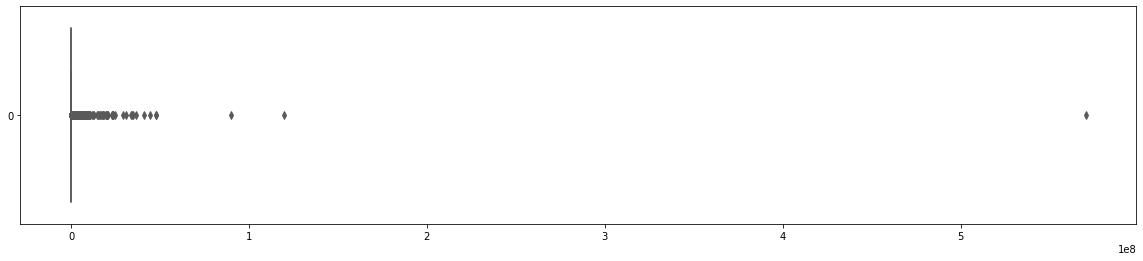

In [303]:
plt.figure(figsize=(20,4))
ax = sns.boxplot(data=dataset["juros"], orient="h", palette="Set2")

(0.0, 20000.0)

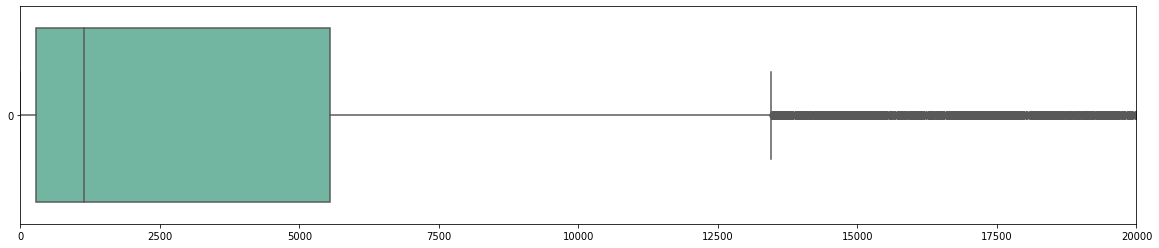

In [304]:
plt.figure(figsize=(20,4))
ax = sns.boxplot(data=dataset["juros"], orient="h", palette="Set2")
plt.xlim(0, 20000)

##### 1) Boxplot para conhecer a dispersão e outliers 
##### 2) Distribuição assimétrica, com outliers que destoam muito da amplitude máxima 
##### 3) A mediana tem uma disposição assimétrica na dispersão (caixa)
##### 4) Para essa variável , o uso do método IQR pode ser uma solução para reduzir as distorções

In [305]:
dataset['valor emprestimo atualizado'].value_counts()

1675.94    123
1673.28     97
1758.88     77
1762.46     74
1646.52     72
          ... 
3243.94      1
5292.33      1
6591.58      1
3588.15      1
2074.02      1
Name: valor emprestimo atualizado, Length: 43191, dtype: int64

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 5. Valor Empréstimo 
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

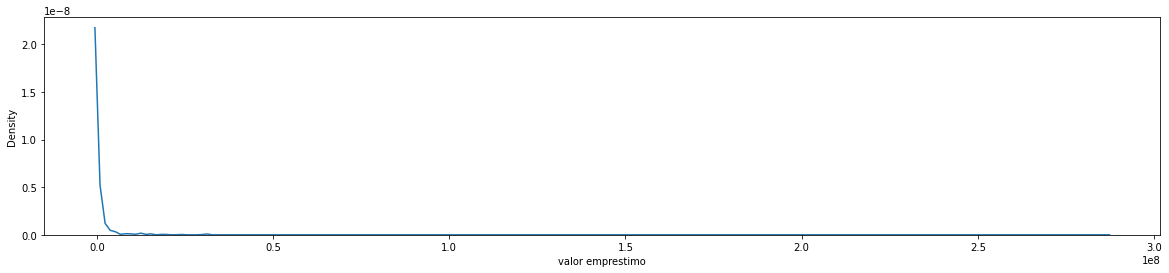

In [306]:
plt.figure(figsize=(20,4))
sns.kdeplot(data=dataset,x="valor emprestimo")
ax.set_xlabel('VALOR EMPRESTIMO')
ax.set_ylabel('IDADE')
plt.show()

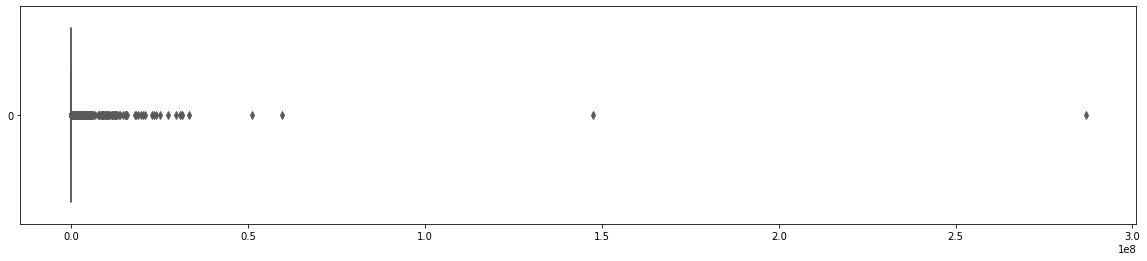

In [307]:
plt.figure(figsize=(20,4))
ax = sns.boxplot(data=dataset["valor emprestimo"], orient="h", palette="Set2")

(0.0, 20000.0)

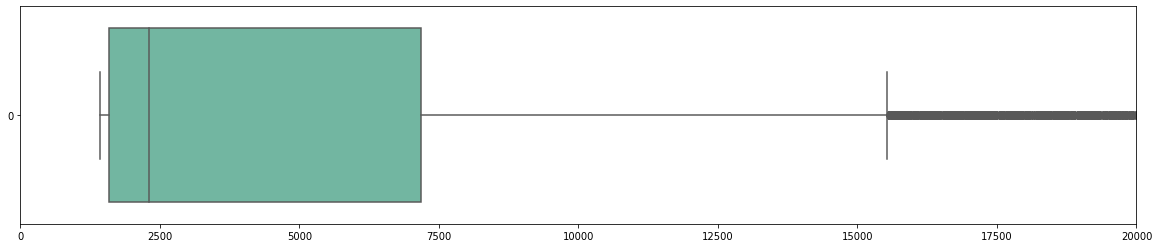

In [308]:
plt.figure(figsize=(20,4))
ax = sns.boxplot(data=dataset["valor emprestimo"], orient="h", palette="Set2")
plt.xlim(0, 20000)

##### 1) Boxplot para conhecer a dispersão e outliers 
##### 2) Distribuição assimétrica, com outliers que destoam muito da amplitude máxima 
##### 3) A mediana tem uma disposição assimétrica na dispersão (caixa)
##### 4) Para essa variável , o uso do método IQR pode ser uma solução para reduzir as distorções

In [309]:
dataset['valor emprestimo'].value_counts()

1593.00     21338
1593.01         9
4593.00         6
2093.00         6
1593.03         6
            ...  
8678.96         1
1634.78         1
36422.97        1
8412.82         1
17580.01        1
Name: valor emprestimo, Length: 28575, dtype: int64

In [310]:
dataset[dataset['valor emprestimo'].isnull()==0]['pago'].value_counts()

1    39853
0    10536
Name: pago, dtype: int64

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 6. Valor Empréstimo Atualizado 
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

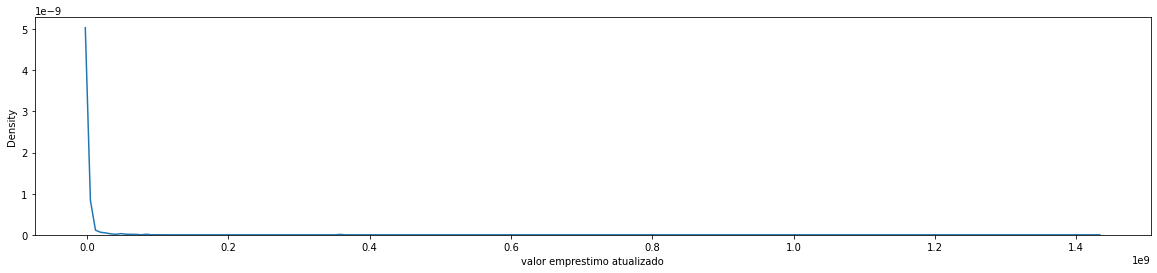

In [311]:
plt.figure(figsize=(20,4))
sns.kdeplot(data=dataset,x="valor emprestimo atualizado")
ax.set_xlabel('VALOR EMPRESTIMO ATUALIZADO')
ax.set_ylabel('IDADE')
plt.show()

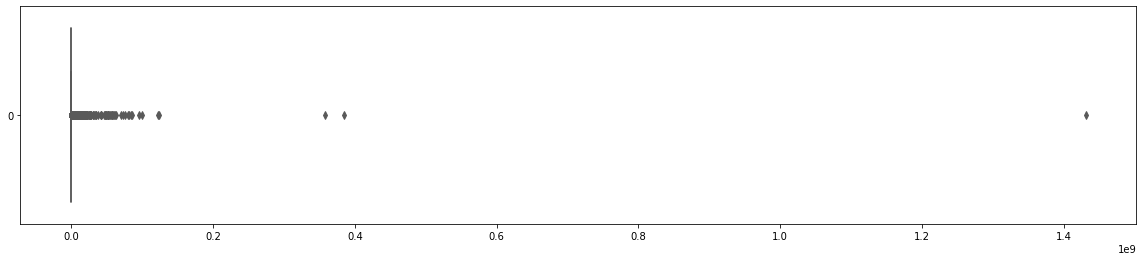

In [312]:
plt.figure(figsize=(20,4))
ax = sns.boxplot(data=dataset["valor emprestimo atualizado"], orient="h", palette="Set2")

(0.0, 100000.0)

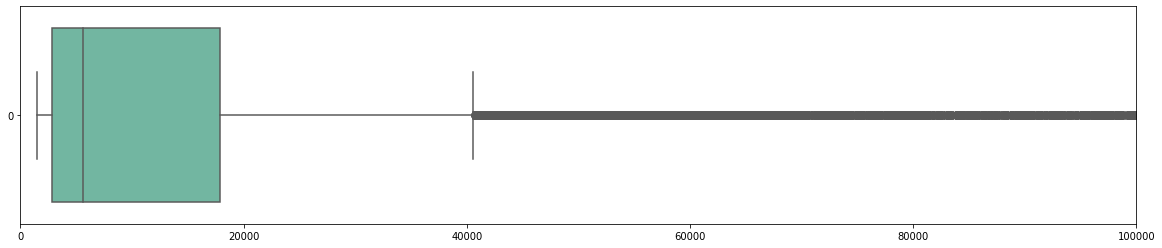

In [313]:
plt.figure(figsize=(20,4))
ax = sns.boxplot(data=dataset["valor emprestimo atualizado"], orient="h", palette="Set2")
plt.xlim(0, 100000)

##### 1) Boxplot para conhecer a dispersão e outliers 
##### 2) Distribuição assimétrica, com outliers que destoam muito da amplitude máxima 
##### 3) A mediana tem uma disposição assimétrica na dispersão (caixa)
##### 4) Para essa variável , o uso do método IQR pode ser uma solução para reduzir as distorções

In [314]:
dataset['valor emprestimo atualizado'].value_counts()

1675.94    123
1673.28     97
1758.88     77
1762.46     74
1646.52     72
          ... 
3243.94      1
5292.33      1
6591.58      1
3588.15      1
2074.02      1
Name: valor emprestimo atualizado, Length: 43191, dtype: int64

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 7. Valor Conta Corrente
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [315]:
dataset['valor conta corrente'].isnull().sum()

50389

##### Coluna com valor nulo para todas as entradas, apesar de ser potencialmente muito importante é candidata a ser retirada por sua condição nula.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
####  8. Valor Conta Poupança
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [316]:
dataset['valor conta corrente'].unique().shape[0]

1

##### Coluna com valor nulo para todas as entradas, apesar de ser potencialmente muito importante é candidata a ser retirada por sua condição nula.

##### Não é interessante uma possível relação entre ID e as outras variáveis:

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 9. ID 
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
##### Não é interessante uma possível relação entre ID e as outras variáveis:
##### 1 - O formato numérico da variável pode gerar certas distorções.
##### 2 - Uma possível criação de valores categóricos para ID seria computacionalmente muito custoso. Uma alternativa foi a criação da variável Recorrência, que contém a informação do n° de empréstimos para valores únicos de ID.

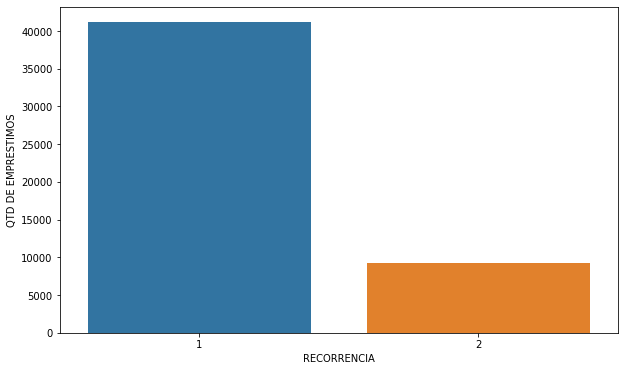

In [317]:
plt.figure(figsize=(10,6))
graph=sns.countplot(x='recorrencia',data=dataset,
                   order=dataset['recorrencia'].value_counts().index)
graph.set_xlabel('RECORRENCIA')
graph.set_ylabel('QTD DE EMPRESTIMOS')
plt.show()

In [318]:
dataset['id'].unique().shape[0]

45783

In [319]:
dataset['id'].value_counts()

1372552.0    2
1378336.0    2
1386076.0    2
1339624.0    2
1336744.0    2
            ..
1370995.0    1
1383142.0    1
1435408.0    1
1422127.0    1
1510609.0    1
Name: id, Length: 45783, dtype: int64

##### 1 - Existem IDs com mais de 1 empréstimo na base de dados

## 2.3 Variável Alvo - Pago (Classificação Binária)

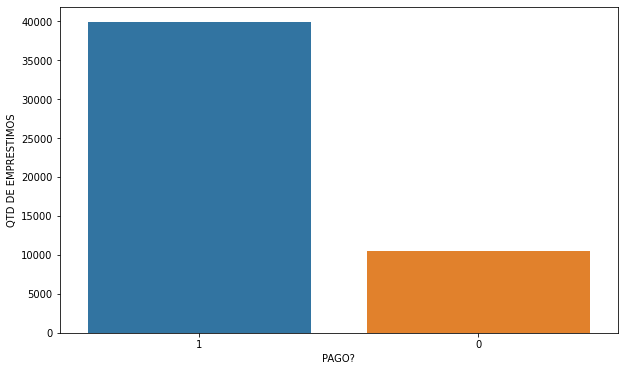

In [320]:
plt.figure(figsize=(10,6))
graph=sns.countplot(x='pago',data=dataset,
                   order=dataset['pago'].value_counts().index)
graph.set_xlabel('PAGO?')
graph.set_ylabel('QTD DE EMPRESTIMOS')
plt.show()

##### A distribuição de valores entre as categorias em relação a variável preditora é desbalanceada 
##### (0) - Não
##### (1) - Sim

In [321]:
dataset['pago'].value_counts()

1    39853
0    10536
Name: pago, dtype: int64

#### Porcentagem de NÃO pagos no total:

In [322]:
pos=dataset[dataset['pago']==1].shape[0]
neg=dataset[dataset['pago']==0].shape[0]
total=pos+neg
print("Inadimplência é : ",round(neg/total*100,2),"%")

Inadimplência é :  20.91 %


#### Porcentagem de NÃO pagos com recorrência (ID):

In [323]:
neg=dataset[dataset['recorrencia'] > 1]['pago'].value_counts()[0]
pos=dataset[dataset['recorrencia'] > 1]['pago'].value_counts()[1]
total=pos+neg
print("Inadimplência é : ",round(neg/total*100,2),"%")

Inadimplência é :  10.67 %


## 2.4 Filtrando Atributos 

In [324]:
colunas_dropadas=['valor conta corrente','valor conta poupanca','id','data','controle']
dataset.drop(colunas_dropadas,axis=1,inplace=True)
dataset["escolaridade"]=dataset["escolaridade"].astype('int8')

In [325]:
for c in dataset.columns[dataset.dtypes == object]:
    dataset[c] = dataset[c].astype('category')
for c in dataset.columns[dataset.dtypes == 'category']:
    dataset[c] = dataset[c].cat.codes

## 2.5 Missing Values

In [326]:
missing_colunas = [features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in missing_colunas:
    print(feature, np.round(dataset[feature].isnull().mean()*100,4), '% de missing values')

renda mensal informal 80.6148 % de missing values
quant adiantamento deposito 56.6513 % de missing values
qtd fonte renda 74.5857 % de missing values


## 2.6 Filtrando Outliers

In [327]:
#feature_with_outliers = ['idade', 'valor emprestimo', 'multa', 'juros', 'valor emprestimo atualizado']
feature_with_outliers = ['valor emprestimo']
print(dataset.shape)
 
#dataset = remover_outlier_percentil(dataset, feature)

for feature in feature_with_outliers: 
    dataset = remover_outlier_percentil(dataset, feature)
    print(dataset.shape)

(50389, 23)
(26526, 23)


In [328]:
dataset = dataset[dataset['idade']<80]

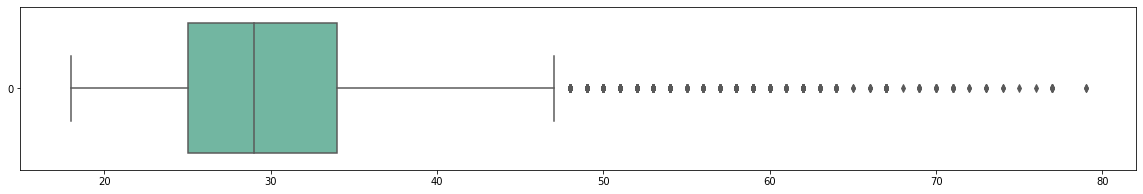

In [329]:
plt.figure(figsize=(20,3))
ax = sns.boxplot(data=dataset["idade"], orient="h", palette="Set2")

In [330]:
dataset[feature_with_outliers].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26481 entries, 4138 to 40278
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor emprestimo  26481 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [331]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26481 entries, 4138 to 40278
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   escolaridade                 26481 non-null  int8   
 1   renda mensal informal        4670 non-null   float64
 2   dependentes                  26481 non-null  int8   
 3   estado civil                 26481 non-null  int64  
 4   idade                        26481 non-null  int64  
 5   conta poupanca               26481 non-null  int8   
 6   conta salario                26481 non-null  int8   
 7   quant adiantamento deposito  10518 non-null  float64
 8   qtd fonte renda              6036 non-null   float64
 9   cheque sem fundo             26481 non-null  int8   
 10  conta conjunta               26481 non-null  int8   
 11  valor emprestimo             26481 non-null  float64
 12  multa                        26481 non-null  float64
 13  juros        

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 3 Associações
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [332]:
dataset.head()

,escolaridade,renda mensal informal,dependentes,estado civil,idade,conta poupanca,conta salario,quant adiantamento deposito,qtd fonte renda,cheque sem fundo,...,juros,valor emprestimo atualizado,genero,estado,recorrencia,missing escolaridade,missing renda informal,missing adiantamento,missing fonte renda,pago
4138,1,619.1534,0,2,27,1,1,3.0,2.0,0,...,0.00,1593.01,1,58,1,0,0,0,0,1
26029,4,NaN,1,2,33,1,0,NaN,1.0,0,...,0.00,1593.01,1,58,1,1,1,1,0,1
24195,1,NaN,0,2,27,1,0,NaN,NaN,0,...,0.01,1593.02,1,59,1,0,1,1,1,1
8925,4,NaN,0,8,29,1,0,NaN,NaN,0,...,0.01,1593.02,0,56,1,1,1,1,1,1
7713,1,NaN,0,2,27,1,0,NaN,NaN,0,...,0.01,1593.02,0,56,1,0,1,1,1,1


In [333]:
# features para visualizacao do pairplot
numericas = ["idade","juros","multa","valor emprestimo"]
mult_categoricas = ["escolaridade","estado civil","cheque sem fundo","conta conjunta","genero","estado"]
binarias = ['dependentes','conta poupanca','conta salario','cheque sem fundo','genero','missing renda informal','missing adiantamento', 'missing fonte renda']

<Figure size 1440x288 with 0 Axes>

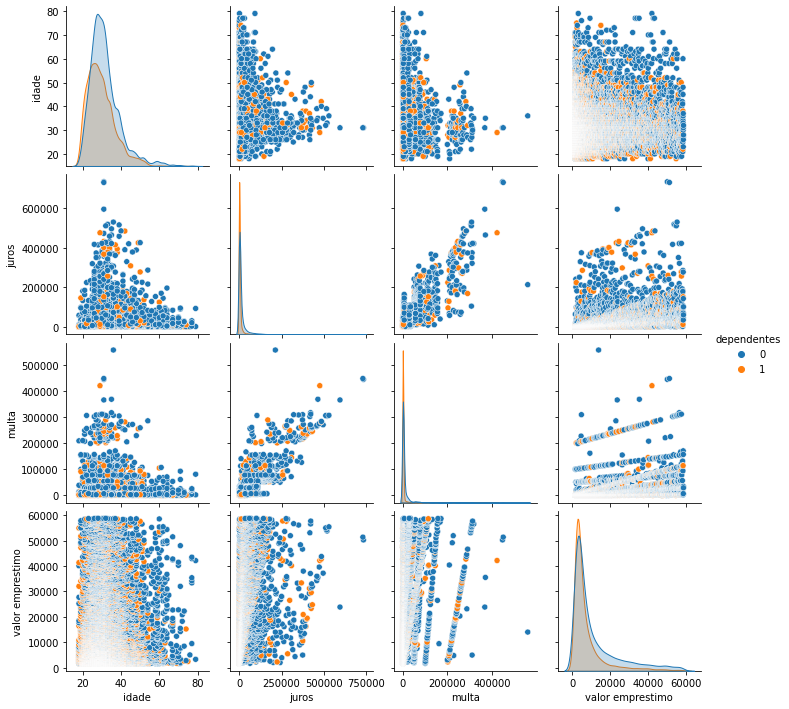

<Figure size 1440x288 with 0 Axes>

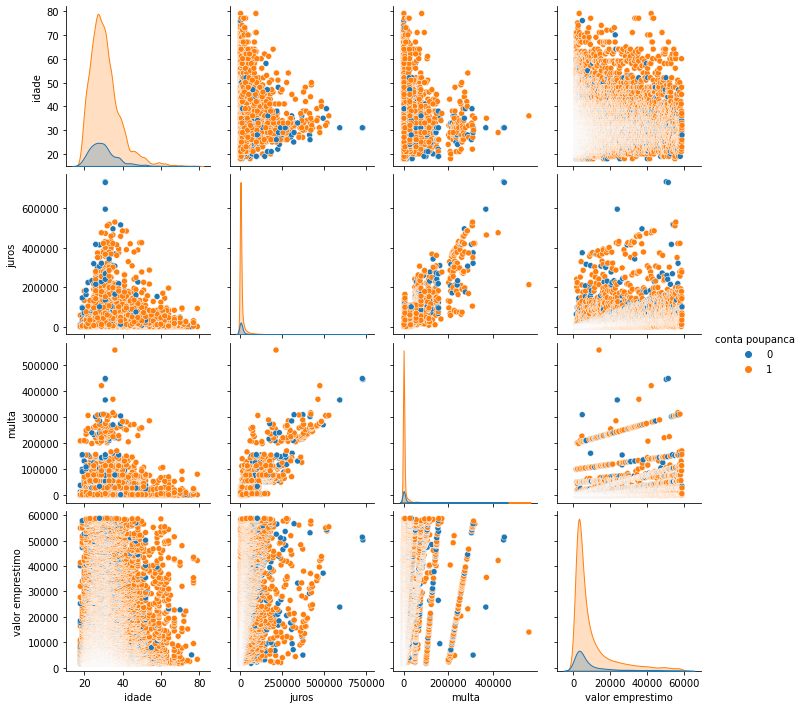

<Figure size 1440x288 with 0 Axes>

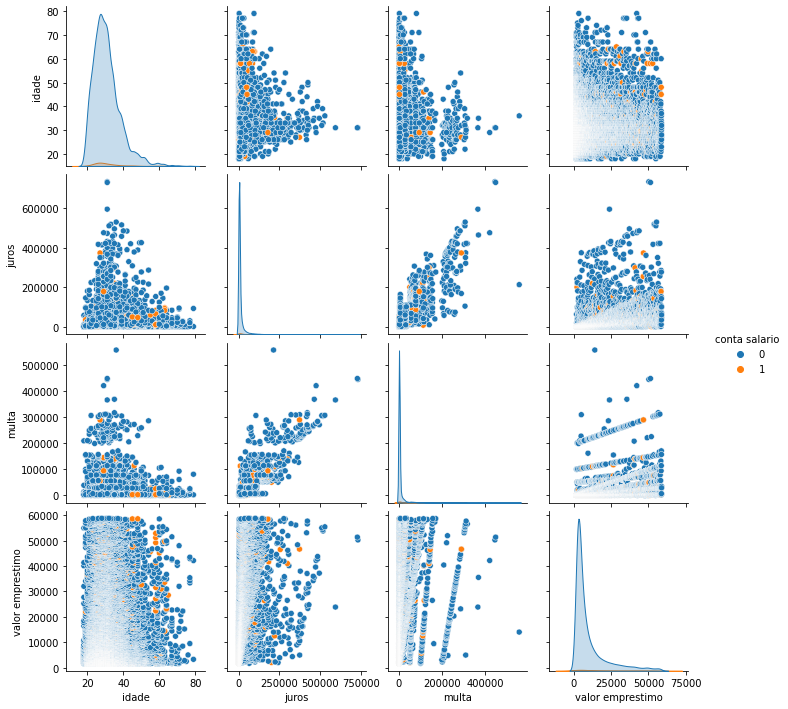

<Figure size 1440x288 with 0 Axes>

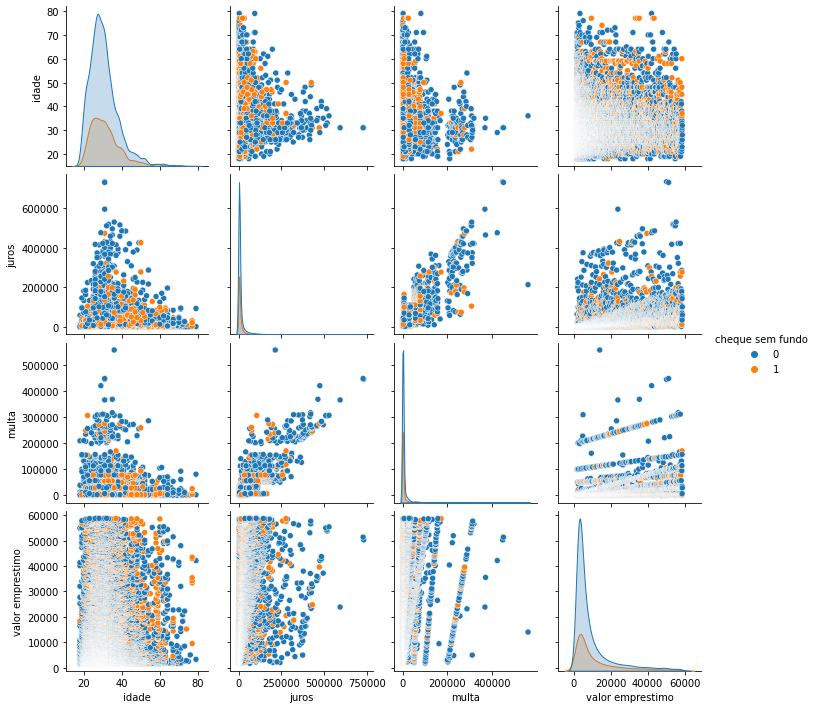

<Figure size 1440x288 with 0 Axes>

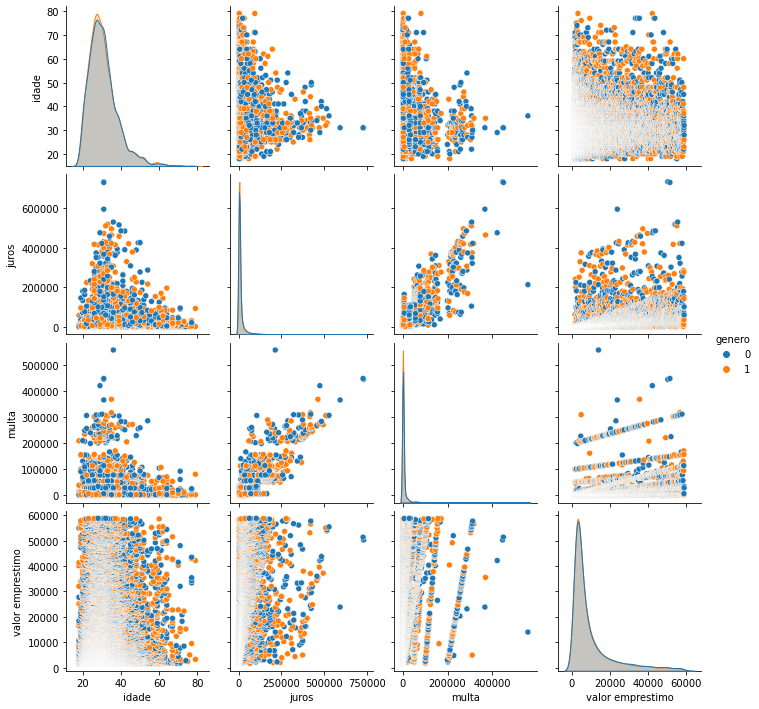

<Figure size 1440x288 with 0 Axes>

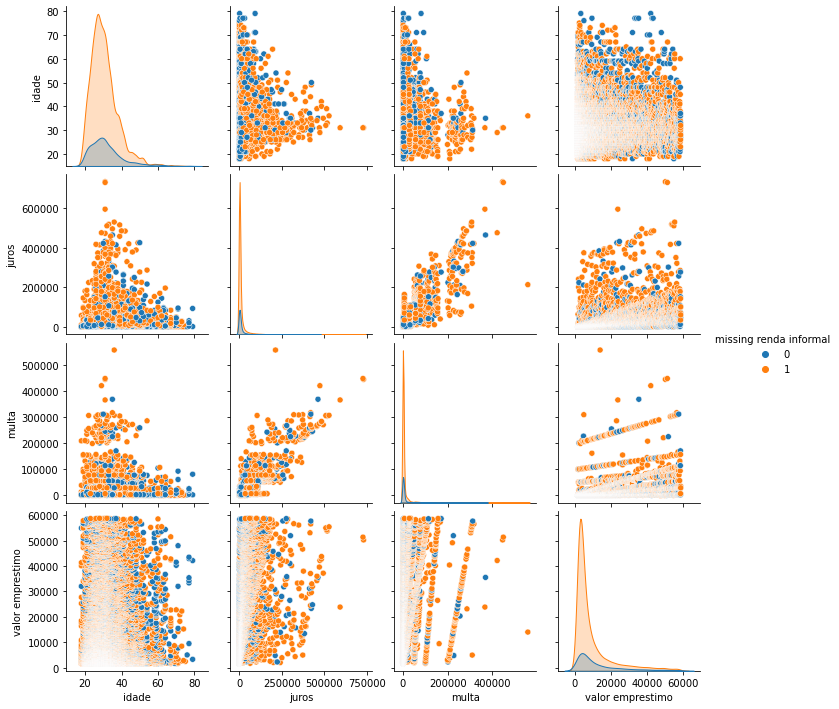

<Figure size 1440x288 with 0 Axes>

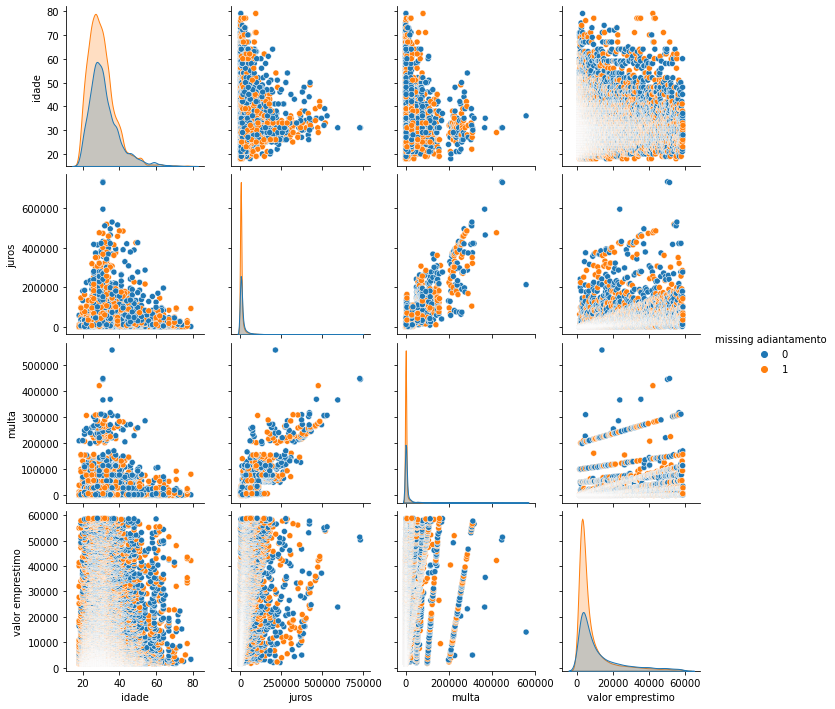

<Figure size 1440x288 with 0 Axes>

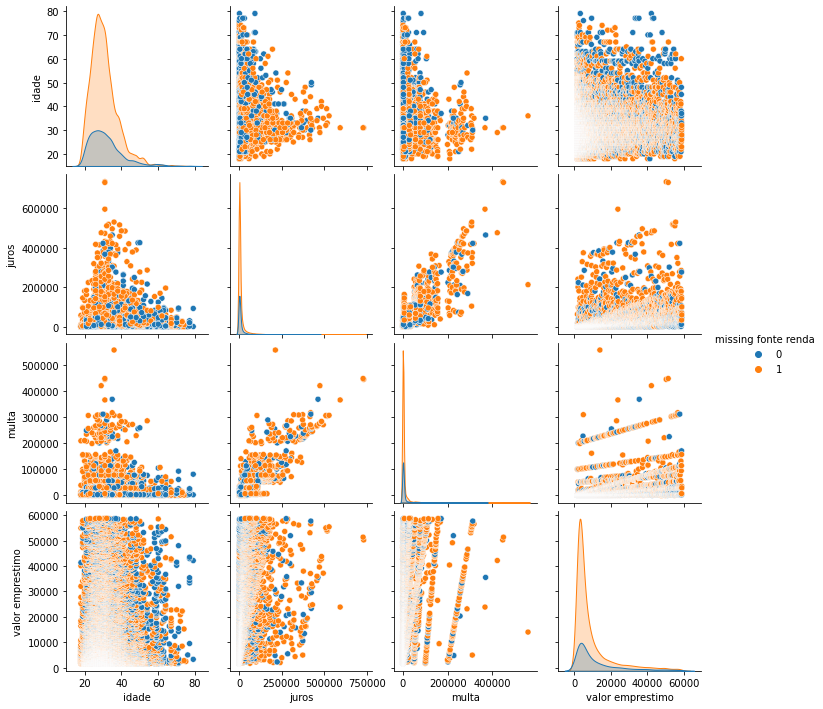

In [334]:
for feature in binarias:
    plt.figure(figsize=(20,4))
    sns.pairplot(dataset,hue=feature, x_vars = numericas,y_vars = numericas)

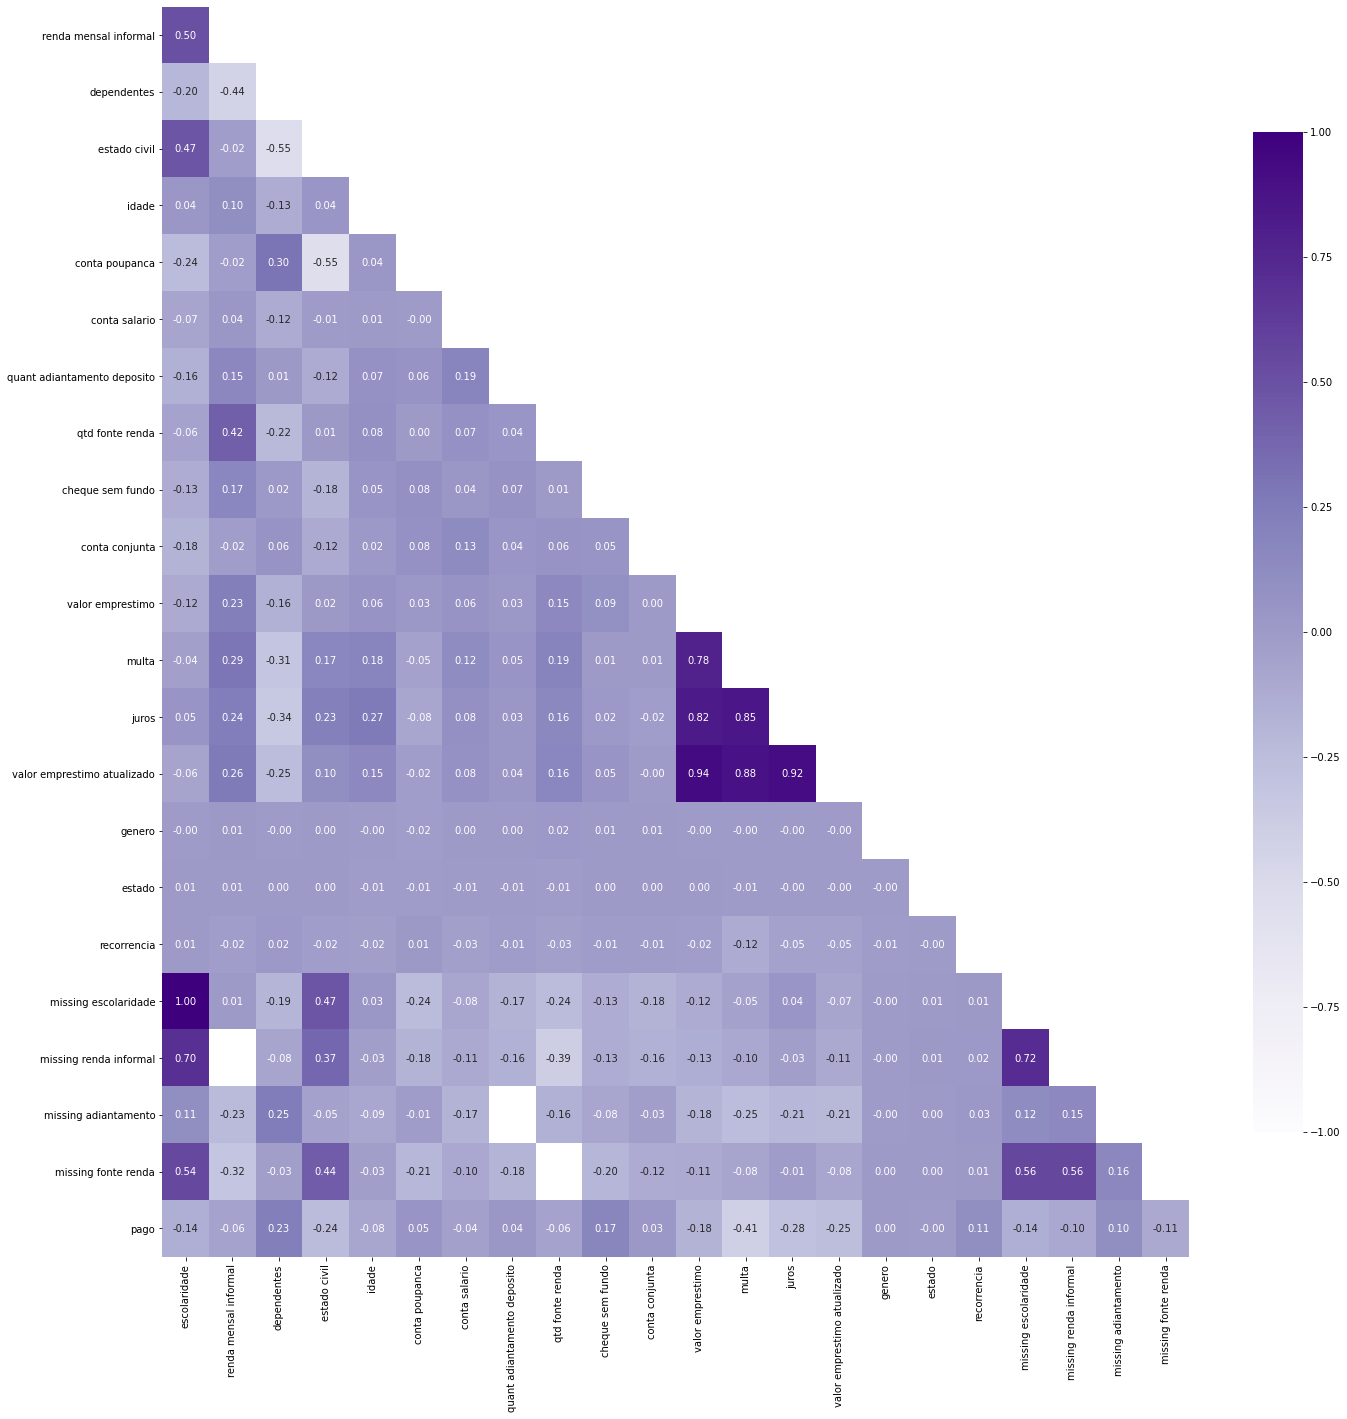

In [335]:
f,ax=plt.subplots(figsize=(dataset.shape[1],dataset.shape[1]))
df_corr = dataset.corr(method = "spearman")
mask = np.triu(np.ones_like(df_corr, dtype=bool))
#print(mask)
mask = mask[1:,:-1]
#print(mask)
corr = df_corr.iloc[1:,:-1].copy()
#print(corr)
sns.heatmap(corr, mask=mask,annot=True,fmt=".2f", cmap='Purples', vmin=-1, vmax=1, cbar_kws={"shrink":.8})
plt.show()

### 3.1 Análise das Principais Associações

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 1. Escolaridade | Renda Mensal Informal

In [336]:
dataset[dataset['missing renda informal']==1]['pago'].value_counts()

1    17406
0     4405
Name: pago, dtype: int64

In [337]:
neg=dataset[dataset['missing renda informal'] == 1]['pago'].value_counts()[0]
pos=dataset[dataset["missing renda informal"] == 1]['pago'].value_counts()[1]
total=pos+neg
print("Inadimplência para Valores Faltantes é : ",round(neg/total*100,2),"% || Inadimplência Absoluta :",round(neg/dataset.shape[0]*100,2),"%")

Inadimplência para Valores Faltantes é :  20.2 % || Inadimplência Absoluta : 16.63 %


In [338]:
dataset['missing renda informal'].shape[0]

26481

In [339]:
dataset[dataset['missing renda informal']==0]['pago'].value_counts()

1    4191
0     479
Name: pago, dtype: int64

In [340]:
neg=dataset[dataset['missing renda informal'] == 0]['pago'].value_counts()[0]
pos=dataset[dataset["missing renda informal"] == 0]['pago'].value_counts()[1]
total=pos+neg
print("Inadimplência para Valores NÃO Faltantes é : ",round(neg/total*100,2),"% || Inadimplência Absoluta :",round(neg/dataset.shape[0]*100,2),"%")

Inadimplência para Valores NÃO Faltantes é :  10.26 % || Inadimplência Absoluta : 1.81 %


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 2. Valor Emprestimo | Juros | Multa | Valor Empréstimo Atualizado 

##### 1) As 4 variáveis possuem índices de correlação > 0.8 entre si.
##### 2) A composição de 'valor emprestimo' + 'juros' + 'multa' resultam em 'valor empréstimo atualizado'
##### 3) É possível dizer que existem 4 variáveis com grau alto de informação mútua.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 4 Avaliação das Features
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Níveis de Classificação dos Atributos: 
### (1) - Relevante para o modelo
### (2) - Neutra ou Dispensável
### (3) - Irrelevante ou Sem Impacto
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## Escolaridade - Classificação : 1
### Com a utilização da categoria criada (4 - Não Informado), a categoria escolaridade possui informação valiosa para o modelo
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Renda Mensal Informal - Classificação : 2
### Dados Faltantes, mas como são muito importantes, a utilização das colunas faltantes e de métodos de imputação para substituir valores faltantes podem ser soluções
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Dependentes - Classificação : 1
### Dados integrais e relacionados com a situação financeira do indivíduo
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Estado Civil - Classificação : 1
### O conhecimento do perfil de consumo doméstico pode ser útil
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Idade - Classificação : 1
### Pode ajudar no conhecimento das tendências de consumo a cada faixa etária
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Conta Poupança - Classificação : 1
### Dados integrais e relacionados com a situação financeira do indivíduo
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Conta Salário - Classificação : 1
### Dados integrais e relacionados com a situação financeira do indivíduo
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Quant. Adiantamento Depósito - Classificação : 1
### Dados Faltantes, mas como são muito importantes, a utilização das colunas faltantes e de métodos de imputação para substituir valores faltantes podem ser soluções
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Qtd Fonte Renda - Classificação : 2
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Cheque Sem Fundo - Classificação : 1
### Dados integrais e relacionados com a situação financeira do indivíduo
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Conta Conjunta - Classificação : 1
### Dados integrais e relacionados com a situação financeira do indivíduo
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Valor Conta Corrente - Classificação : 3
### É potencialmente importante para o modelo, mas como está completamente vazia, é irrelevante
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Valor Conta Poupança - Classificação : 3
### É potencialmente importante para o modelo, mas como está completamente vazia, é irrelevante
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Valor Empréstimo - Classificação : 2
### Torna-se redundante com o uso da variável 'valor emprestimo atualizado'
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Multa - Classificação : 2
### Torna-se redundante com o uso da variável 'valor emprestimo atualizado'
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Juros - Classificação : 2
### Torna-se redundante com o uso da variável 'valor emprestimo atualizado'
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Valor Empréstimo Atualizado - Classificação : 1
### Pode substituir as variáveis 'multa','juros' e 'valor emprestimo' devido ao alto grau de informação mútua
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Gênero - Classificação : 2
### As distribuições são homogêneas para a variável preditora, mas podem existir certas relações com outras variáveis que podem variar para cada gênero
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## ID - Classificação : 2
### Pode ser substituida pela variável 'recorrencia', ser usada em decision trees como categórica(apesar da alta cardinalidade) ou ser transformada em dummy (apesar do custo computacional)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Data - Classificação : 3
### Todas as ocorrências possuem a mesma data de acesso para extração da base de dados
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Estado - Classificação : 2
### Pode ser utilizada, mas a homogeneidade na distribuição entre os estados torna essa variável dispensável a fim de simplificar o modelo

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 4 Modelagem
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Escolha e Tratamento de Features

In [341]:
dataset.columns

Index(['escolaridade', 'renda mensal informal', 'dependentes', 'estado civil',
       'idade', 'conta poupanca', 'conta salario',
       'quant adiantamento deposito', 'qtd fonte renda', 'cheque sem fundo',
       'conta conjunta', 'valor emprestimo', 'multa', 'juros',
       'valor emprestimo atualizado', 'genero', 'estado', 'recorrencia',
       'missing escolaridade', 'missing renda informal',
       'missing adiantamento', 'missing fonte renda', 'pago'],
      dtype='object')

In [342]:
features_escolhidas = ['escolaridade','conta poupanca','conta salario','dependentes','estado civil','idade','cheque sem fundo','conta conjunta','valor emprestimo atualizado','genero','estado','recorrencia','missing renda informal','missing adiantamento','missing fonte renda']
alvo = "pago"
#features_opcionais = ['genero','estado','juros','multa','valor emprestimo']
#features_descartadas = missing_colunas

## Modelos

In [343]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, f1_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib

In [344]:
df_modelo = dataset[features_escolhidas].copy()
y = dataset[alvo]
X = df_modelo

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42, shuffle = True, stratify = y) 

In [346]:
# testando o stratify
sum(y_train)/len(y_train), sum(y_test)/len(y_test)  

(0.8155481225722918, 0.815607300188798)

In [347]:
# Label classes are imbalanced (1:4) 
y_test.value_counts(1)

1    0.815607
0    0.184393
Name: pago, dtype: float64

### First approach: Random Forest

In [348]:
df_modelo.head(5)

,escolaridade,conta poupanca,conta salario,dependentes,estado civil,idade,cheque sem fundo,conta conjunta,valor emprestimo atualizado,genero,estado,recorrencia,missing renda informal,missing adiantamento,missing fonte renda
4138,1,1,1,0,2,27,0,0,1593.01,1,58,1,0,0,0
26029,4,1,0,1,2,33,0,0,1593.01,1,58,1,1,1,0
24195,1,1,0,0,2,27,0,0,1593.02,1,59,1,1,1,1
8925,4,1,0,0,8,29,0,0,1593.02,0,56,1,1,1,1
7713,1,1,0,0,2,27,0,0,1593.02,0,56,1,1,1,1


In [349]:
classificador_forest = RandomForestClassifier(n_estimators=400, n_jobs= -1, min_samples_leaf=20)
modelo_floresta = classificador_forest.fit(X_train, y_train)
y_predict = modelo_floresta.predict(X_test)
print(y_predict)

[1 1 1 ... 1 1 1]


In [350]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.71      0.26      0.38      1465
           1       0.85      0.98      0.91      6480

    accuracy                           0.84      7945
   macro avg       0.78      0.62      0.64      7945
weighted avg       0.83      0.84      0.81      7945



In [351]:
type(y_predict)

numpy.ndarray

### Second Approach: RandomizedSearchCV (Random Forest)

In [352]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_jobs= -1,verbose = False))
hyperparameters = {'randomforestclassifier__max_features': [2,6,10,15],
'randomforestclassifier__max_depth': [1,5,10,15],
'randomforestclassifier__criterion':['entropy'],
'randomforestclassifier__n_estimators':[200,600],
'randomforestclassifier__min_samples_leaf':[10,20,40],
'randomforestclassifier__min_samples_split':[10,20,40]}

#Testar o decision thresholding 
#hyperparameters = {'randomforestclassifier__max_features': ['auto',None,'log2'],
#'randomforestclassifier__max_depth': [None,3,1],
#'randomforestclassifier__criterion':['gini','entropy'],
#'randomforestclassifier__n_estimators':[200,400,600,1000],
#'randomforestclassifier__min_samples_leaf':[10,20,50],
#'randomforestclassifier__min_samples_split':[10,20,50]}

scoring_ = ['precision','f1']
#scoring_ = ['f1']
random_clf = RandomizedSearchCV(pipeline,hyperparameters,
                                cv=10, scoring= scoring_,refit = 'f1',
                                verbose = 1, n_iter=20, return_train_score=True)
# n_iter = 10 arranjos

In [353]:
%%time
modelo_search = random_clf.fit(X_train, y_train)
#print(y_predict)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
CPU times: user 16min 2s, sys: 828 ms, total: 16min 3s
Wall time: 17min 54s


In [361]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      0.29      0.40      1465
           1       0.86      0.97      0.91      6480

    accuracy                           0.84      7945
   macro avg       0.77      0.63      0.66      7945
weighted avg       0.83      0.84      0.82      7945



### Como se trata de um problema de 'loan default', as metricas observadas serao precision e recall (f1). No caso, acertar a concessao para nao conceder emprestimos para possiveis futuros inadimplentes (precision da classe 1) tem mais importancia

In [362]:
y_predict = modelo_search.predict(X_test)
y_prob = modelo_search.predict_proba(X_test)
y_true = np.array(y_test)
y_prob = y_prob[:,1]
print(y_true)
print(y_prob)

[1 0 1 ... 1 0 1]
[0.83874601 0.85564745 0.94662153 ... 0.88641914 0.72994134 0.76935212]


### A precision-recall curve fornece bons valores quando se lida com imbalanced classes

f1 = 0.910 / auc = 0.939


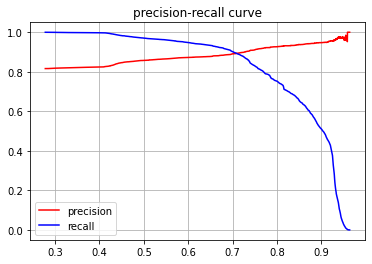

In [363]:
precision, recall, threshold = precision_recall_curve(y_true,y_prob)
plt.plot(threshold, precision[:-1], c = 'r', label = 'precision')
plt.plot(threshold, recall[:-1], c = 'b', label = 'recall')
plt.grid()
plt.legend()
plt.title('precision-recall curve')
f1_ = f1_score(y_test, y_predict)
auc_ = auc(recall, precision)
print('f1 = %.3f / auc = %.3f' %(f1_, auc_))

In [364]:
# ajuste manual do decision threshold 

decision_threshold = 0.705  #ajuste baseado na curva
decision_predict = []
for value in y_prob:
    if value < decision_threshold:
        decision_predict.append(0)
    else:
        decision_predict.append(1)
print("precision antiga:", precision_score(y_test,y_predict))
print("precision atual:", precision_score(y_test,decision_predict)) 

precision antiga: 0.8573571525978454
precision atual: 0.8917177914110429


In [365]:
# report para o novo valor de threshold 

print(metrics.classification_report(y_test,decision_predict))

              precision    recall  f1-score   support

           0       0.53      0.52      0.53      1465
           1       0.89      0.90      0.89      6480

    accuracy                           0.83      7945
   macro avg       0.71      0.71      0.71      7945
weighted avg       0.83      0.83      0.83      7945



<AxesSubplot:>

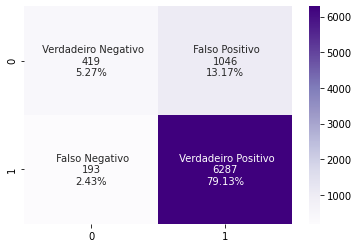

In [366]:
#confusion matrix para a predict original

cf_matrix = confusion_matrix(y_test,y_predict)
#cf_matrix.flatten()
group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f" {v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Purples')

<AxesSubplot:>

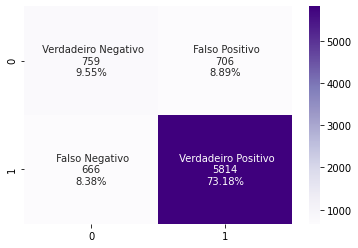

In [367]:
#confusion matrix para a predict com nova threshold 

cf_matrix = confusion_matrix(y_test,decision_predict)
#cf_matrix.flatten()
group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f" {v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Purples')